# 001 Introduction

Importando as bibliotecas necessárias.



In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Definindo a janela principal e carregando a imagem em escala de cinza.

In [4]:
path_img = '/data/Documents/UFAL/repos/pdi/img/'
img_g = cv.imread(path_img + 'Lenna.png', cv.IMREAD_GRAYSCALE)
print(img_g.shape)

(512, 512)


O código abaixo não executaria apropriamente pois cv.imshow não renderiza no notebook.
```
cv.namedWindow('img', cv.WINDOW_KEEPRATIO)
cv.imshow('img', img)
```

Logo usamos o `pyplot`, como mostrado na próxima célula.

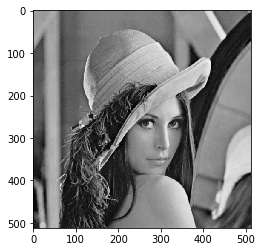

In [5]:
# pyplot como plt
plt.imshow(img_g, cmap='gray')
plt.show()

Carregando uma imagem colorida mudamos a flag de `cv.IMREAD_GRAYSCALE` para `cv.IMREAD_COLOR`.

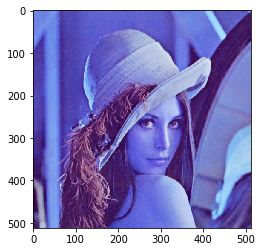

In [6]:
img = cv.imread(path_img + 'Lenna.png', cv.IMREAD_COLOR)
plt.imshow(img)
plt.show()

Ficou estranho, né? Isso acontece pois `opencv` ordena os canais RGB como BGR. Sendo assim, antes de mostrar a imagem precisamos convertê-la.

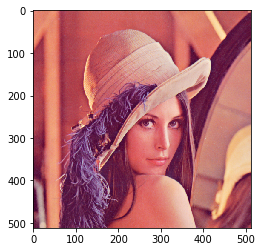

In [7]:
img_c = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_c)
plt.show()

Visualizando, agora, os três canais separadamente. Antes, no entanto, dividimos com `cv.split`.

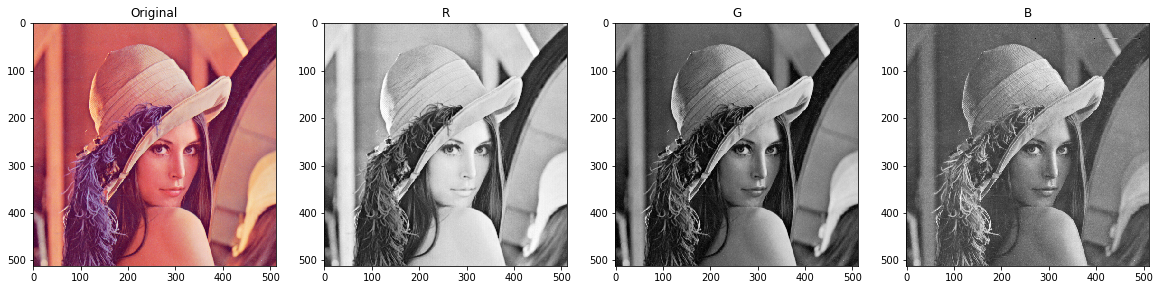

In [8]:
rgb = cv.split(img_c)

plt.rcParams['figure.figsize'] = [20, 10]  # Necessário para aumentar o tamanho da figura aqui no jupyter.
plt.subplot(141), plt.title('Original'), plt.imshow(img_c)
plt.subplot(142), plt.title('R'), plt.imshow(rgb[0], 'gray')
plt.subplot(143), plt.title('G'), plt.imshow(rgb[1], 'gray')
plt.subplot(144), plt.title('B'), plt.imshow(rgb[2], 'gray')
plt.show()

## Visualizando histogramas

Lembrando que `img_g` é a imagem da Lenna em escala de cinza, a usamos como entrada do método `plt.hist`.

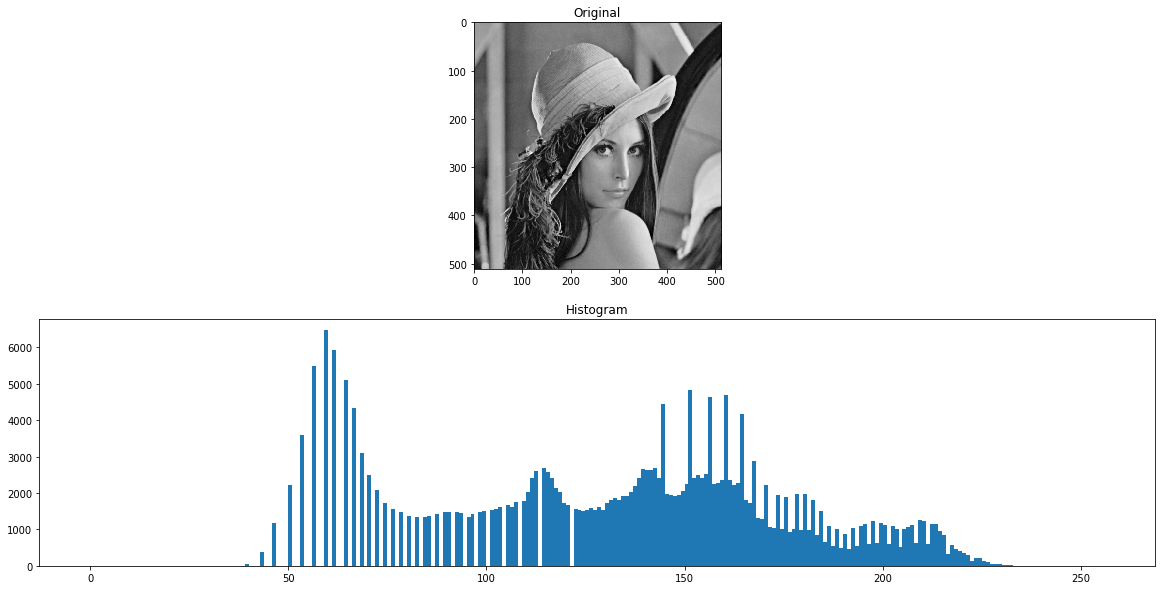

In [9]:
plt.subplot(211), plt.title("Original"), plt.imshow(img_g, 'gray')
plt.subplot(212), plt.title("Histogram"), plt.hist(img_g.ravel(), 256, [0, 256])
plt.show()
# Lembre que img_g.ravel() retorna img_g como um array de 1D.

Visualizando, agora, os histogramas de cada canal da imagem colorida, dessa vez com `cv.calcHist`.

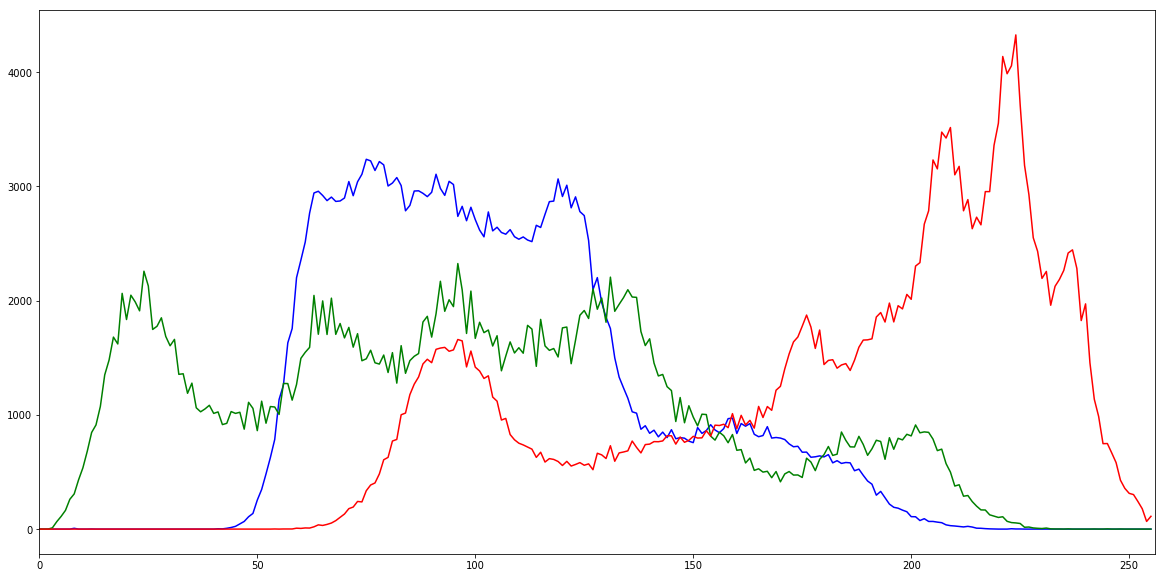

In [10]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

## Criando imagens

Criando imagens preenchida de 0s, 1s e algum escalar.

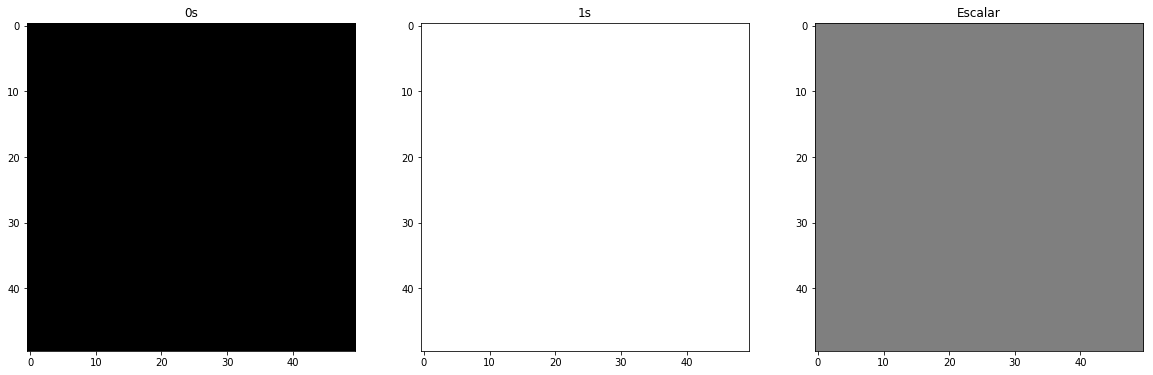

In [11]:
img_0 = np.zeros((50, 50), dtype=np.uint8)
img_1 = 255*np.ones((50, 50), dtype=np.uint8)
img_e = 127*np.ones((50, 50), dtype=np.uint8)
plt.subplot(131), plt.title('0s'), plt.imshow(img_0, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.subplot(132), plt.title('1s'), plt.imshow(img_1, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.subplot(133), plt.title('Escalar'), plt.imshow(img_e, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.show()

# Sem 'vmin' e 'vmax', 'plt.imshow' se autoajusta ao intervalo do dado passado.

# Vale notar que, se fosse cv.imshow em vez de 'plt.imshow',
# não haveria necessidade de parâmetros do tipo 'vmin' e 'vmax'.

Agora mostro como inicializar uma imagem colorida e em escala de cinza com valores uniforme e normalmente distribuídos.

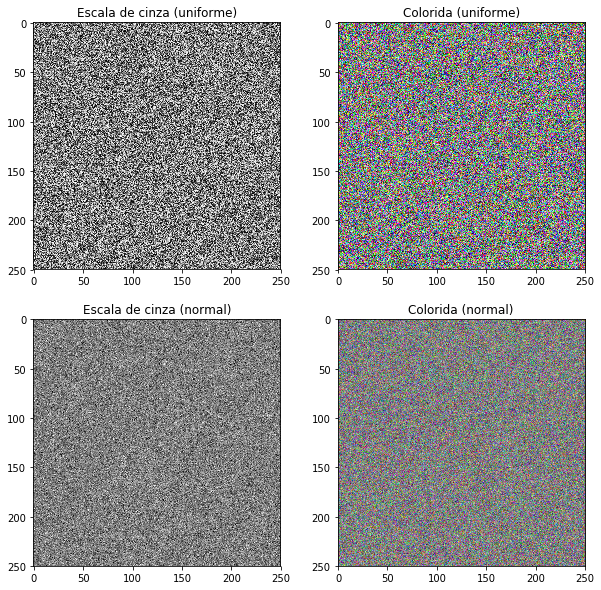

In [12]:
# Criando imagem em escala de cinza
imgg_u = np.ones((250, 250), dtype=np.uint8)
cv.randu(imgg_u, 0, 255)
# Agora criando a imagem colorida
imgc_u = np.ones((250, 250, 3), dtype=np.uint8)  # Note o valor '3', que indica que a imagem tem três canais.
bgr = cv.split(imgc_u)
# Necessário setar os valores aleatórios em cada canal separadamente
cv.randu(bgr[0], 0, 255)
cv.randu(bgr[1], 0, 255)
cv.randu(bgr[2], 0, 255)
imgc_u = cv.merge(bgr)
# Mesma coisa, porém usando valores normalmente distribuídos
imgg_n = np.ones((250, 250), dtype=np.uint8)
cv.randn(imgg_n, 127, 40)
# Colorida
imgc_n = np.ones((250, 250, 3), dtype=np.uint8)
bgr = cv.split(imgc_n)
cv.randn(bgr[0], 127, 40)
cv.randn(bgr[1], 127, 40)
cv.randn(bgr[2], 127, 40)
imgc_n = cv.merge(bgr)
# Plotando as 4 imagens
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(221), plt.title('Escala de cinza (uniforme)'), plt.imshow(imgg_u, 'gray')
plt.subplot(222), plt.title('Colorida (uniforme)'), plt.imshow(imgc_u)
plt.subplot(223), plt.title('Escala de cinza (normal)'), plt.imshow(imgg_n, 'gray')
plt.subplot(224), plt.title('Colorida (normal)'), plt.imshow(imgc_n)
plt.show()
# As imagens coloridas passadas acima estão como 'bgr', do jeito que o opencv quer,
# mas aqui, como exemplo, não importa qual canal é qual.

## Visualizando histogramas

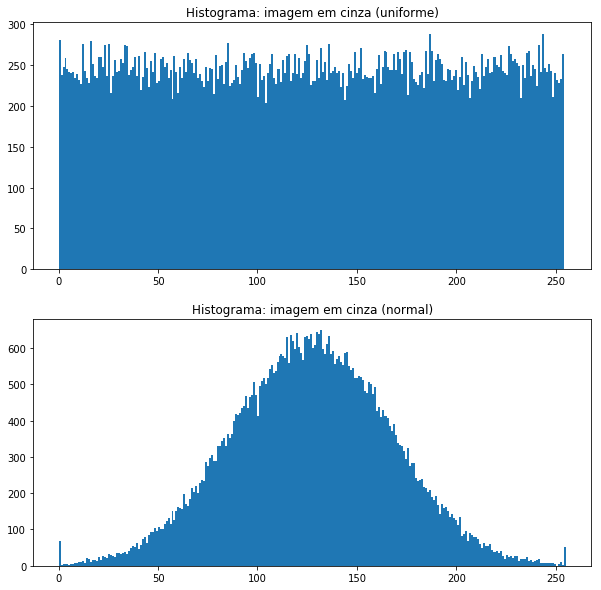

In [13]:
plt.subplot(211), plt.title("Histograma: imagem em cinza (uniforme)"), plt.hist(imgg_u.ravel(), 256, [0, 255])
plt.subplot(212), plt.title("Histograma: imagem em cinza (normal)"), plt.hist(imgg_n.ravel(), 256, [0, 255])
plt.show()

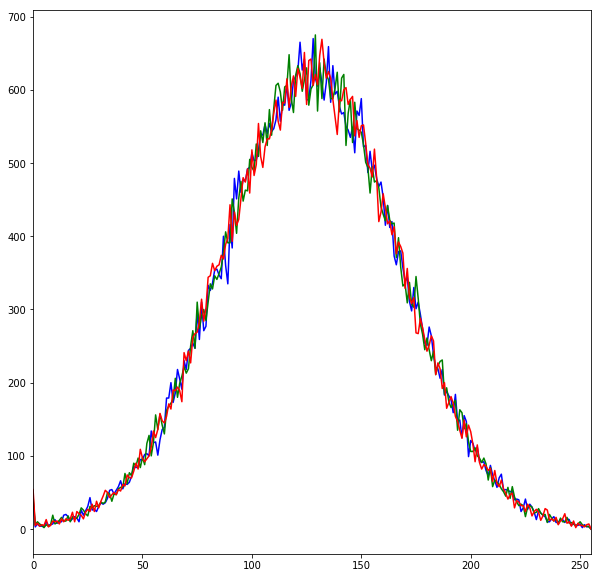

In [14]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([imgc_n], [i], None, [256], [0, 255])
    plt.plot(histr, color=col)
    plt.xlim([0, 255])
plt.show()

## Convertendo imagens 

In [23]:
# Intervalos diferentes
img = np.ones((3, 3), dtype=np.float32)
cv.randn(img, 0, 1)
print("Normally distributed values = \n", img, "\n\n")

Normally distributed values = 
 [[ 0.42825797  0.09417823  0.48403203]
 [ 1.6594322   0.11126054 -0.95856893]
 [-0.84583545 -0.9348642   0.15008754]] 




In [21]:
# Normalizada
cv.normalize(img, img, 255, 0, cv.NORM_MINMAX)
print("Normalized = \n", img, "\n\n")

Normalized = 
 [[235.07475   0.      114.43468]
 [179.56958 197.16757 161.26486]
 [162.63165 248.83952 255.     ]] 




In [22]:
# Convertida para inteiro de 8 bits sem sinal
img = np.asarray(img, dtype=np.uint8)
print("Converted to uint8 = \n", img, "\n\n")

Converted to uint8 = 
 [[235   0 114]
 [179 197 161]
 [162 248 255]] 




Criando imagens normalmente distribuídas continuamente.

In [24]:
img = np.ones((250, 250), dtype=np.uint8)
while cv.waitKey(1) != ord('q'):
    cv.randn(img, 120, 60)
    cv.imshow("img", img)  # Abrirá um visualizador 
cv.destroyAllWindows()